# Justin Butler
AAE 537 - Homework 5

Project created in Jupyter notebook and formatted in \LaTeX

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Part i)

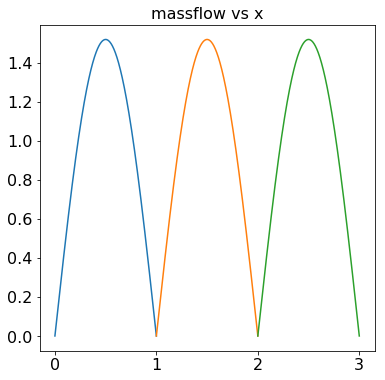

In [4]:
def dmDot(x):
    a = (np.pi /2)*(2.9/3)
    dmDot = a * np.sin(np.pi*x)
    return(dmDot)
x1 = np.linspace(0,1,500)
x2 = np.linspace(0,1,500)
x3 = np.linspace(0,1,500)
y1 = [dmDot(item) for item in x1]
y2 = [dmDot(item) for item in x2]
y3 = [dmDot(item) for item in x3]
x2 = [item + 1 for item in x2]
x3 = [item + 2 for item in x3]

## GRAPHING TIME! ##
plt.figure(figsize=(6,6))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
#
plt.plot(x1,y1,'-')
plt.plot(x2,y2,'-')
plt.plot(x3,y3,'-')
#
plt.title('massflow vs x', fontsize=16)
#
#plt.ylim(0,1.5)
#plt.xlabel('Massflow ratio: $m_{air}$/$m_{fuel}$', fontsize=14)
#plt.ylabel('Exit Area $A_e$ ($m^2$)', fontsize=14)
#plt.legend(loc=2, fontsize=16)

plt.show()
plt.close()